## <center>坚果R1微博粉丝通推广</center >
### <span style="color:orange"><center>用户互动分析</center ><span>

### <span style="color:orange">业务场景<span>
#### 分析任何数据之前先看一下数据背后的业务场景，搞明白数据代表的含义；
#### 这是坚果R1手机微博粉丝通的其中一个推广活动数据，由"惟真科技"官方账号发布广告。

####  活动页面展示

In [1]:
%%html
<img src="./1.png", width=500>

#### 用户互动详情

In [2]:
%%html
<img src="./2.png", width=500>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl
import sklearn as sk
%matplotlib inline
import datetime
import time
import os
import seaborn as sns

#### 显示中文标签，负号

In [4]:
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [5]:
df = pd.read_csv('data.csv')

### <span style="color:orange">数据观察<span>
#### 数据观察在数据分析中是非常重要的，为后续决策提供思路：数据有哪些特征？哪些数据需要清洗？

In [6]:
df.head()

,id,mid,uid,parent,t,reposts_count,attitudes_count,comments_count,text,original_text,...,province,city,verified,verified_reason,verified_type,user_location,user_avatar,user_geo_enabled,picture,geo
0,4242425860188448,4242425860188448,6208395989,null,1526956607,3859,1190,2690,次世代旗舰手机#坚果R1#，内藏来自未来的“电脑”，应该用来自未来的方式感受。点击体验：ht...,次世代旗舰手机#坚果R1#，内藏来自未来的“电脑”，应该用来自未来的方式感受。点击体验：ht...,...,33,1000,True,惟真科技有限公司官方微博,2,浙江,https://tvax1.sinaimg.cn/crop.0.0.200.200.180/...,False,null,null
1,4242429152513496,4242429152513496,3831881845,4242425860188448,1526957393,0,0,0,锤子科技，坚果R1[鼓掌][鼓掌][good][good],锤子科技，坚果R1[鼓掌][鼓掌][good][good],...,34,17,False,NaN,-1,安徽 池州,https://tvax1.sinaimg.cn/crop.0.0.960.960.180/...,True,null,null
2,4242435666349141,4242435666349141,2610108217,4242425860188448,1526958946,0,1,0,抽我[污],抽我[污],...,11,1000,False,NaN,-1,北京,https://tvax3.sinaimg.cn/crop.0.0.1342.1342.18...,True,null,null
3,4242439423860642,4242439423860642,5277533822,4242425860188448,1526959842,0,0,0,敢不敢抽我[doge],敢不敢抽我[doge],...,100,1000,False,NaN,-1,其他,https://tva2.sinaimg.cn/crop.0.0.996.996.180/0...,True,null,null
4,4242439495713283,4242439495713283,5659095877,4242425860188448,1526959859,0,0,0,哇哦 酷炫,哇哦 酷炫,...,100,1000,False,NaN,-1,其他,https://tvax4.sinaimg.cn/crop.0.0.996.996.180/...,True,null,null


*  text是将original_text中的评论内容提炼出来，保留text列即可  
*  screen_name和username：都是微博用户的昵称，要删除一列  
*  id和mid：都是用来标识单条评论，保留一列即可
*  user_avatar：微博用户头像链接。我们这次不涉及复杂的图像识别，所以这列数据也可以去掉  

* t和user_created_at：是时间戳，要转为日期时间格式

In [7]:
df.shape

(3825, 30)

* 数据量：3825 columns x 30 rows

#### 看一下空值都有多少

In [7]:
df.isnull().sum()

id                       0
mid                      0
uid                      0
parent                   0
t                        0
reposts_count            0
attitudes_count          0
comments_count           0
text                    34
original_text            0
user_created_at          0
followers_count          0
bi_followers_count       0
favourites_count         0
statuses_count           0
friends_count            0
username                 0
screen_name              0
user_description      1316
gender                   0
province                 0
city                     0
verified                 0
verified_reason       3657
verified_type            0
user_location            0
user_avatar              0
user_geo_enabled         0
picture                  0
geo                      0
dtype: int64

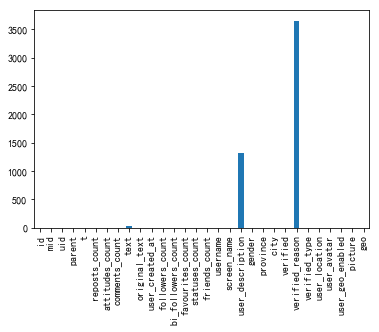

In [10]:
df.isnull().sum().plot(kind='bar')

* user_description和verified_reason的空值很多

#### <span style="color:green">verified_reason 微博身份认证<span>
verified_reason的空值非常多，只有168条数据。  
通过微博认证的都是在公众熟悉的某领域内有一定知名度和影响力的人，从认证的身份能看出其所属的领域，是很重要的信息，不能直接删除，先放着。

In [13]:
df.verified_reason.notnull().sum()

168

In [14]:
df.verified_reason.value_counts().head(10)

数码博主                 10
知名数码博主                6
互联网资讯博主               5
摄影博主                  4
惟真科技有限公司官方微博          4
数码博主 头条文章作者           3
手机之友网  手机测评师          2
美食博主                  2
摄影博主 娱乐综艺视频自媒体        2
北京翔林通电子商务有限公司营运经理     2
Name: verified_reason, dtype: int64

#### <span style="color:green">user_description 个人简介<span>

In [13]:
df.user_description.value_counts().index

Index(['无', '。', '超爱 休斯顿火箭、JAY、还有电子产品😁', '自由', '。。。', '嗯', '介绍下自己', '三小。',
       '自从造天地以来，神的永能和神性是明明可知的，虽是眼不能见，但藉着所造之物就可以晓得，叫人无可推诿。',
       '花落还开，水流不断。明月清风，不劳牵挂。',
       ...
       '仗义每多屠狗辈，负心皆是读书人！', '在水一方', '标准苦逼矮穷挫，没才没钱没人品。', '永远支持德国队的内拉祖里！',
       '欲将心事付瑶琴，知音少，弦断有谁听', 'DOOOOOOP', '光荣的叶子？', 'Share the life.',
       '世界如此美好，你却如此暴躁，这样不好不好！', '少林寺驻武当山办事处大神父王喇嘛'],
      dtype='object', length=2287)

* 信息比较乱，也很难看出兴趣偏好，分析的价值不大，我们选择删除这一列

#### picture和geo没有空值，但是数据前五行都显示null，这是怎么回事？

In [14]:
df.picture.value_counts()

null    3825
Name: picture, dtype: int64

In [15]:
df.geo.value_counts()

null    3825
Name: geo, dtype: int64

* 原来都是 "null" 字符串，那么这两列数据可以删除

#### 再用describe()查看数值型数据的分布

In [16]:
df.describe()

,id,mid,uid,t,reposts_count,attitudes_count,comments_count,user_created_at,followers_count,bi_followers_count,favourites_count,statuses_count,friends_count,province,city,verified_type
count,3.825000e+03,3.825000e+03,3.825000e+03,3.825000e+03,3825.000000,3825.000000,3825.000000,3.825000e+03,3.825000e+03,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000
mean,4.242886e+15,4.242886e+15,4.021377e+09,1.527066e+09,1.026667,0.371503,0.751111,1.386427e+09,9.499495e+02,51.518431,247.782222,2295.164444,517.398170,52.805752,334.705098,15.009935
std,2.654151e+11,2.654151e+11,1.814218e+09,6.327991e+04,62.396369,19.242908,43.495903,7.680313e+07,2.060564e+04,121.006061,1747.700323,6657.039982,709.014491,58.435412,467.769426,57.011041
min,4.242426e+15,4.242426e+15,9.831745e+06,1.526957e+09,0.000000,0.000000,0.000000,1.251448e+09,0.000000e+00,-29.000000,0.000000,1.000000,1.000000,11.000000,1.000000,-1.000000
25%,4.242748e+15,4.242748e+15,2.246039e+09,1.527033e+09,0.000000,0.000000,0.000000,1.315061e+09,4.100000e+01,3.000000,1.000000,88.000000,114.000000,32.000000,2.000000,-1.000000
50%,4.242840e+15,4.242840e+15,3.827875e+09,1.527055e+09,0.000000,0.000000,0.000000,1.383350e+09,1.110000e+02,15.000000,8.000000,438.000000,281.000000,37.000000,8.000000,-1.000000
75%,4.243094e+15,4.243094e+15,5.760352e+09,1.527116e+09,0.000000,0.000000,0.000000,1.448609e+09,3.060000e+02,52.000000,64.000000,2023.000000,616.000000,51.000000,1000.000000,-1.000000
max,4.243586e+15,4.243586e+15,6.558672e+09,1.527233e+09,3859.000000,1190.000000,2690.000000,1.527180e+09,1.242671e+06,1703.000000,59155.000000,158361.000000,8890.000000,400.000000,1000.000000,220.000000


* 可以看到最大值和四分位数的差距很大，感觉数据分布不均匀

#### <span style="color:green">高端异常值<span>
我们的分析对象是参与互动的用户，惟真科技作为广告发布方不应该加入分析数据；  
父微博的互动数据统计在惟真科技名下，再加上互动最活跃，产生的数据会比正常用户多很多。

Text(0,0.5,'评论数')

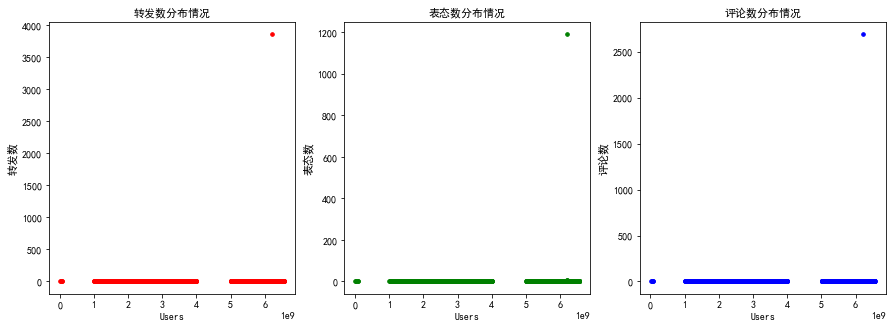

In [17]:
fig = plt.figure(figsize=(15,5))
fig.set(alpha=0.2)

plt.subplot2grid((1,3),(0,0))

plt.scatter(df.uid, df.reposts_count, color='r', s=13)
plt.title('转发数分布情况', fontsize=11)
plt.xlabel('Users')
plt.ylabel('转发数', fontsize=11)

plt.subplot2grid((1,3),(0,1))
plt.scatter(df.uid, df.attitudes_count, color='g', s=13)                             
plt.title("表态数分布情况", fontsize=11)
plt.xlabel('Users')
plt.ylabel('表态数', fontsize=11)

plt.subplot2grid((1,3),(0,2))
plt.scatter(df.uid, df.comments_count, color='b', s=13)                             
plt.title("评论数分布情况", fontsize=11)
plt.xlabel('Users')
plt.ylabel('评论数', fontsize=11)

#### 惟真科技的 uid 是 6208395989，我们来看一下它的互动量有多少

In [18]:
df.loc[(df.uid.values == 6208395989), :]

,id,mid,uid,parent,t,reposts_count,attitudes_count,comments_count,text,original_text,...,province,city,verified,verified_reason,verified_type,user_location,user_avatar,user_geo_enabled,picture,geo
0,4242425860188448,4242425860188448,6208395989,null,1526956607,3859,1190,2690,次世代旗舰手机#坚果R1#，内藏来自未来的“电脑”，应该用来自未来的方式感受。点击体验：ht...,次世代旗舰手机#坚果R1#，内藏来自未来的“电脑”，应该用来自未来的方式感受。点击体验：ht...,...,33,1000,True,惟真科技有限公司官方微博,2,浙江,https://tvax1.sinaimg.cn/crop.0.0.200.200.180/...,False,null,null
114,4242486589619284,4242486589619284,6208395989,4242425860188448,1526971086,2,3,0,坚果R1互动展示已出，pc端：http://t.cn/R3rBPON 手机端：http://...,坚果R1互动展示已出，pc端：http://t.cn/R3rBPON 手机端：http://...,...,33,1000,True,惟真科技有限公司官方微博,2,浙江,https://tvax1.sinaimg.cn/crop.0.0.200.200.180/...,False,null,null
128,4242487842716995,4242487842716995,6208395989,4242487650319140,1526971386,0,5,1,感谢转发！,感谢转发！//@IT数码推:转发微博,...,33,1000,True,惟真科技有限公司官方微博,2,浙江,https://tvax1.sinaimg.cn/crop.0.0.200.200.180/...,False,null,null
879,4242732560360384,4242732560360384,6208395989,4242609675589008,1527029731,3,9,4,在我们这里可以用来自未来的方式体验很多东西，哈哈,在我们这里可以用来自未来的方式体验很多东西，哈哈//@七只马克杯_ape: 十分想知道这家公...,...,33,1000,True,惟真科技有限公司官方微博,2,浙江,https://tvax1.sinaimg.cn/crop.0.0.200.200.180/...,False,null,null


* 第一条父微博的统计数据太大了，整体拉高了数据上限，是一个高端异常值，我们要把它剔除。
* 惟真科技的数据行号分别为：0，114，128, 879

### <span style="color:orange">数据处理<span>
#### 数据已经大体了解了，接下来该处理空值和数据类型，为数据分析做准备

#### <span style="color:green">删除异常值：uid = 6208395989<span>

In [19]:
df.drop(df.index[[0,114,128,879]], inplace=True)

In [20]:
df.head(3)

,id,mid,uid,parent,t,reposts_count,attitudes_count,comments_count,text,original_text,...,province,city,verified,verified_reason,verified_type,user_location,user_avatar,user_geo_enabled,picture,geo
1,4242429152513496,4242429152513496,3831881845,4242425860188448,1526957393,0,0,0,锤子科技，坚果R1[鼓掌][鼓掌][good][good],锤子科技，坚果R1[鼓掌][鼓掌][good][good],...,34,17,False,NaN,-1,安徽 池州,https://tvax1.sinaimg.cn/crop.0.0.960.960.180/...,True,null,null
2,4242435666349141,4242435666349141,2610108217,4242425860188448,1526958946,0,1,0,抽我[污],抽我[污],...,11,1000,False,NaN,-1,北京,https://tvax3.sinaimg.cn/crop.0.0.1342.1342.18...,True,null,null
3,4242439423860642,4242439423860642,5277533822,4242425860188448,1526959842,0,0,0,敢不敢抽我[doge],敢不敢抽我[doge],...,100,1000,False,NaN,-1,其他,https://tva2.sinaimg.cn/crop.0.0.996.996.180/0...,True,null,null


#### <span style="color:green">删除多余的列<span>

In [21]:
df.drop(['mid','original_text','screen_name','user_description','user_avatar','picture','geo'], axis=1, inplace=True)

In [22]:
df.columns

Index(['id', 'uid', 'parent', 't', 'reposts_count', 'attitudes_count',
       'comments_count', 'text', 'user_created_at', 'followers_count',
       'bi_followers_count', 'favourites_count', 'statuses_count',
       'friends_count', 'username', 'gender', 'province', 'city', 'verified',
       'verified_reason', 'verified_type', 'user_location',
       'user_geo_enabled'],
      dtype='object')

#### <span style="color:green">重命名：columns的名称辨识度太低了，不方便大家理解，我们将它重命名一下<span>

In [23]:
df.rename(columns={'id':'微博id', 'uid':'用户id', 'parent':'父微博id', 't':'评论时间', 'reposts_count':'转发数',
                   'attitudes_count':'表态数', 'comments_count':'评论数', 'text':'评论内容', 'user_created_at':'用户注册时间',
                   'followers_count':'粉丝数', 'bi_followers_count':'互粉数', 'favourites_count':'收藏数', 'statuses_count':'微博数',
                   'friends_count':'关注数', 'username':'用户昵称', 'gender':'性别', 'province':'省级id',
                   'city':'城市id', 'verified':'认证用户', 'verified_reason':'认证原因', 'verified_type':'认证方式',
                   'user_location':'用户所在地', 'user_geo_enabled':'允许标识用户的地理位置'}, inplace=True)

In [24]:
df.columns

Index(['微博id', '用户id', '父微博id', '评论时间', '转发数', '表态数', '评论数', '评论内容', '用户注册时间',
       '粉丝数', '互粉数', '收藏数', '微博数', '关注数', '用户昵称', '性别', '省级id', '城市id', '认证用户',
       '认证原因', '认证方式', '用户所在地', '允许标识用户的地理位置'],
      dtype='object')

#### 数据格式

In [25]:
df.dtypes

微博id            int64
用户id            int64
父微博id          object
评论时间            int64
转发数             int64
表态数             int64
评论数             int64
评论内容           object
用户注册时间          int64
粉丝数             int64
互粉数             int64
收藏数             int64
微博数             int64
关注数             int64
用户昵称           object
性别             object
省级id            int64
城市id            int64
认证用户             bool
认证原因           object
认证方式            int64
用户所在地          object
允许标识用户的地理位置      bool
dtype: object

* 微博id和用户id：不需要进行数学计算，改成object比较合适
* 评论时间和用户注册时间：格式为int，需要将它转换成datetime格式

#### <span style="color:green">转换数据格式<span>

In [26]:
df['微博id'] = df.微博id.astype('object')

In [27]:
df.微博id.head()

1    4242429152513496
2    4242435666349141
3    4242439423860642
4    4242439495713283
5    4242440023501775
Name: 微博id, dtype: object

In [28]:
df['用户id'] = df.用户id.astype('object')

In [29]:
df.用户id.head()

1    3831881845
2    2610108217
3    5277533822
4    5659095877
5    5155582780
Name: 用户id, dtype: object

In [30]:
df['评论时间'] = df.评论时间.apply(lambda x: time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(x)))

In [31]:
df.评论时间.head()

1    2018-05-22 10:49:53
2    2018-05-22 11:15:46
3    2018-05-22 11:30:42
4    2018-05-22 11:30:59
5    2018-05-22 11:33:06
Name: 评论时间, dtype: object

In [32]:
df['用户注册时间'] = df.用户注册时间.apply(lambda x: time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(x)))

In [33]:
df.用户注册时间.head()

1    2013-10-04 00:39:39
2    2012-02-05 21:46:41
3    2014-09-01 20:43:56
4    2015-07-24 06:18:25
5    2014-05-27 11:03:36
Name: 用户注册时间, dtype: object

* 至此数据处理结束

#### 保存数据

In [35]:
df.to_csv("data_new.csv", index=False)